In [9]:
import numpy as np
import pandas as pd
import random

np_vaf = np.array ( [[0, 0.1, 0.2] , [0.1, 0.1, 0.1] , [0.2, 0.2, 0.2 ], [0.3, 0.3, 0.3]] )
print ( np_vaf.shape )

zero_dim = [0]

# df =  [ [{"depth":0, "ref":0, "alt":0}, {"depth":0, "ref":0, "alt":0}], [{"depth":1, "ref":1, "alt":1},{"depth":1, "ref":1, "alt":1}], [{"depth":2, "ref":2, "alt":2},{"depth":2, "ref":2, "alt":2}]] 
# index_interest = [ 0, 1]

index_interest_nonzero =  np.where ( np_vaf[: , zero_dim] != 0   ) [0]    # 완전 그 축상은 아니어도 되지만, 0이면 빼는 것
print ( index_interest_nonzero )


#df = [ row for row in df if df.index(row) in index_interest ]
#print ( [ df.index(row) for row in df ] )

# for i in df.index() :
#     print (i)


(4, 3)
[1 2 3]


In [15]:
np_vaf = np.array ( [[0, 0, 0.2] , [0.1, 0.1, 0.1] , [0.2, 0.2, 0.2 ], [0.3, 0.3, 0.3]] )
zero_dim = [0]
print ( np_vaf[: , zero_dim] == 0  )

print  ( np.all ( np_vaf[: , zero_dim] == 0 , axis = 1 )  )

[[ True]
 [False]
 [False]
 [False]]
[ True False False False]


In [22]:
import itertools

kwargs = {}
kwargs["NUM_BLOCK"] = 3
combi =  itertools.chain(*map(lambda x: itertools.combinations( list (range (kwargs["NUM_BLOCK"])), x), range(1, len( list (range (  kwargs["NUM_BLOCK"])) ) )))

for i in combi:
    print (i)

(0,)
(1,)
(2,)
(0, 1)
(0, 2)
(1, 2)


Text(0.5, 0, 'VAF x 2 (percent)')

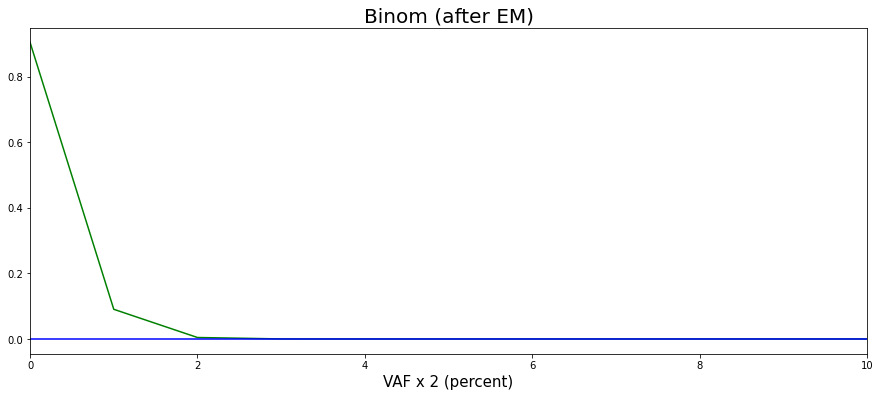

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

x = np.arange(0, 101)
n1, n2, p1, p2 = 100, 100, 0.001, 0.5
y1, y2 = scipy.stats.binom (n1  , p1).pmf(x), scipy.stats.binom (n2 , p2).pmf(x)

fig, ax = plt.subplots(figsize = (15,6)) 
ax.set_xlim( [0, 10] ) 
ax.plot (x, y1, color = "green", label = "clone1")
ax.plot (x, y2, color = "blue", label = "clone2")
ax.set_title ("Binom (after EM)", fontsize = 20)
ax.set_xlabel ("VAF x 2 (percent)", fontsize = 15)


In [14]:
import numpy as np

# Create a sample 2D numpy array with more than two rows
data = np.array([[3, 2, 5],
                 [6, 1, 4],
                 [9, 7, 8],
                 [2, 5, 1]])

data = np.array ( [[3, 2, 5]] )

# Use lexsort to sort the array by the third row, then the second row, and finally the first row
sorted_indices = np.lexsort(tuple(data))

# Use the sorted indices to rearrange the original array
sorted_data = data[:, sorted_indices]

print(sorted_data)

[[2 3 5]]


In [11]:
import numpy as np

# Create a sample 2D numpy array
data = np.array([[3, 2, 5],
                 [6, 1, 4]])

# Use lexsort to sort the array first by the second row, then by the first row
sorted_indices = np.lexsort((data[0, :], data[1, :]))

# Use the sorted indices to rearrange the original array
sorted_data = data[:, sorted_indices]

print(sorted_data)

[3 6]


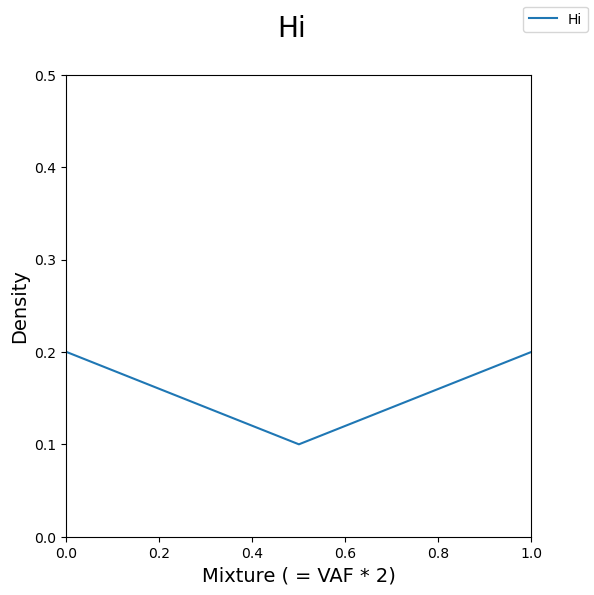

In [36]:
import matplotlib

x = [0, 0.5, 1]
y = [0.2, 0.1, 0.2]

fig, ax = matplotlib.pyplot.subplots (figsize = (6, 6))

matplotlib.rcParams["font.family"] = 'arial'
matplotlib.pyplot.style.use("default")
fig.suptitle("Hi", fontsize = 20)
ax.plot (x, y, label = "Hi")
ax.set_xlabel("Mixture ( = VAF * 2)", fontdict = {"fontsize" : 14})
ax.set_ylabel("Density", fontdict = {"fontsize" : 14})
ax.axis ( [0, 1, 0, 0.5] )
fig.legend()

# matplotlib.spines.Spines.set_visible(False)
#print (matplotlib.spines.Spines.values)
#matplotlib.spines.Spines["top"].set_visible(False)

### Scipy interpolate + extrapolate
- 2차원까지는 괜찮은데 n차원이 될까?
- 안 되면 차원축소 해야하는데 상당히 귀찮을 듯..

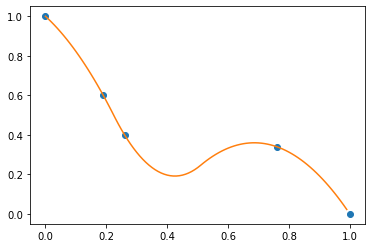

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

x = [0, 0.19, 0.26, 0.76, 1]
y = [1, 0.6, 0.4, 0.34, 0 ]
f = scipy.interpolate.interp1d(x, y, fill_value = "extrapolate", kind = "quadratic")

xnew = np.arange(0, 1, 0.01)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

### NORMAL DISTRIBUTION
- Y1 ~ N(m1, sd1), Y2 ~ N(m2, sd2) 일 때 Y

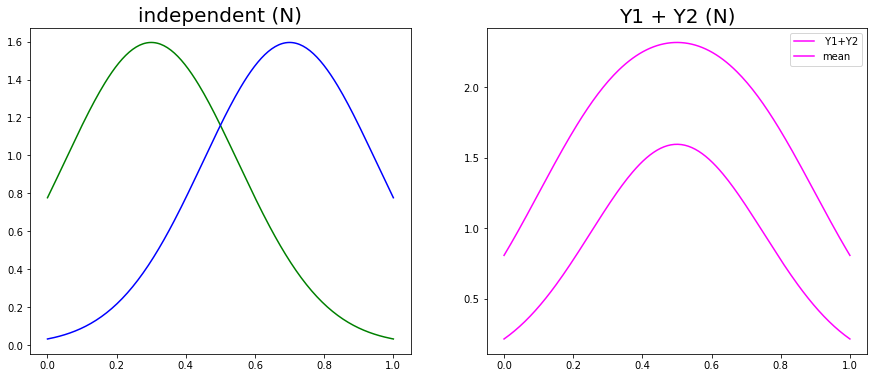

In [24]:
import scipy.stats

x = np.linspace(0,1,200)
m1, m2, sd1, sd2 = 0.3, 0.7, 0.25, 0.25
y1, y2, y3 = scipy.stats.norm (m1, sd1).pdf (x), scipy.stats.norm (m2, sd2).pdf (x), scipy.stats.norm (np.mean([m1,m2]), np.mean([sd1,sd2])).pdf (x)

fig, ax = plt.subplots(ncols = 2, figsize = (15,6)) 
ax[0].plot (x, y1, color = "green")
ax[0].plot (x, y2, color = "blue")
ax[0].set_title ("independent (N)", fontsize = 20)

ax[1].plot(x, y1+ y2, color = "magenta", label = " Y1+Y2")
ax[1].plot(x, y3, color = "magenta", label = "mean")
ax[1].set_title ("Y1 + Y2 (N)", fontsize = 20)
plt.legend()

### BINOMIAL DISTRIBUTION

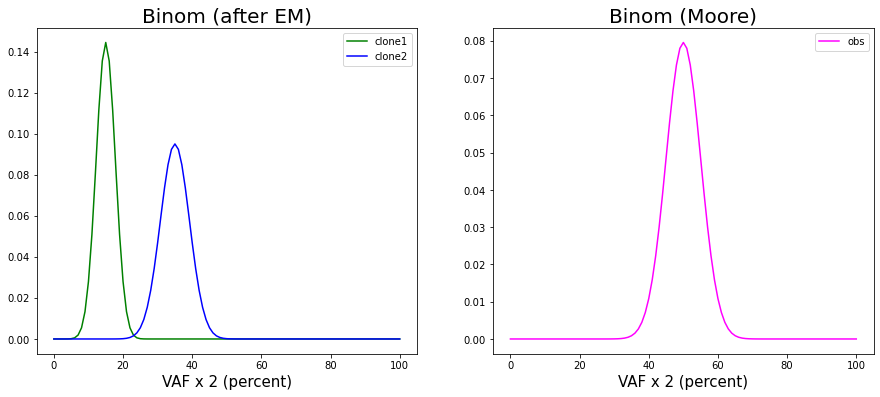

In [51]:
x = np.arange(0, 101)
n1, n2, p1, p2 = 30, 70, 0.5, 0.5
y1, y2 = scipy.stats.binom (n1  , p1).pmf(x), scipy.stats.binom (n2 , p2).pmf(x)

fig, ax = plt.subplots(ncols = 2, figsize = (15,6)) 
ax[0].plot (x, y1, color = "green", label = "clone1")
ax[0].plot (x, y2, color = "blue", label = "clone2")
ax[0].set_title ("Binom (after EM)", fontsize = 20)
ax[0].set_xlabel ("VAF x 2 (percent)", fontsize = 15)

y3 = np.zeros((n1+n2) + 1)
for i in range(len(y3)):
    y3[i] = 0
    for a1 in range(i + 1):        # distribution 1에서 기여해야 할 alt
        a2 = i - a1       # distribution 2에서 기여해야 할 alt
        try:
            y3[i] = y3[i] + (y1[a1] * y2[a2])
        except:
            continue

#ax[1].plot(x, y1+ y2, color = "magenta", label = " Y1+Y2")
ax[1].plot(x, y3, color = "magenta", label = "obs")
ax[1].set_title ("Binom (Moore)", fontsize = 20)
ax[1].set_xlabel ("VAF x 2 (percent)", fontsize = 15)
ax[0].legend(); ax[1].legend()

### BETA DISTRIBUTION

<Figure size 864x288 with 0 Axes>

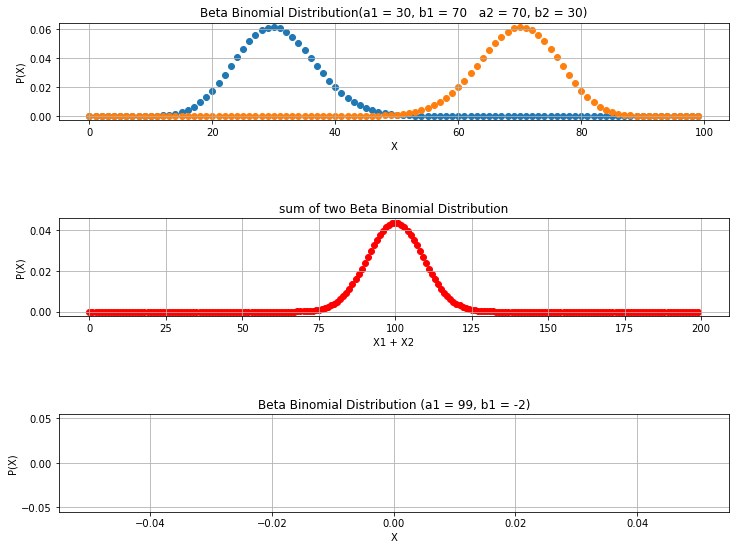

In [37]:
import scipy.stats
from scipy.stats import binom
from matplotlib import pyplot as plt
from scipy.special import beta, gamma, factorial, comb

#scipy.stats.betabinom.cdf(9, 40, a+1, b+1)
a1, b1 = 30, 70
a2, b2 = 70, 30

depth1 = depth2 = 100

x1, x2 = [i for i in range(0,depth1)], [i for i in range(0,depth2)]
y1, y2 = [], []

for xx in x1:
    y1.append(scipy.stats.betabinom.pmf(xx, depth1, a1+1, b1+1))
for xx in x2:
    y2.append(scipy.stats.betabinom.pmf(xx, depth2, a2+1, b2+1))
    
x3 = [i for i in range(0,int((depth1 + depth2)/2))]
y4 = []     # y4 : 그냥 단순히 a = a1 + a2, b = b1 + b2로 계산

for xx in x3:
    y4.append(scipy.stats.betabinom.pmf(xx, int((depth1 + depth2)/2), a1+a2+2, int((depth1 + depth2)/2) - (a1+a2+2)) )

    

plt.figure(figsize=(12, 4))

fig, ax = plt.subplots(ncols = 1,nrows = 3, figsize = (12,9)) 
fig.subplots_adjust(hspace=1)
for i in range(0,3):
    ax[i].grid()

ax[0].scatter(x1, y1)
ax[0].scatter(x2, y2)
ax[0].set_xlabel('X')
ax[0].set_ylabel('P(X)')
ax[0].set_title(f'Beta Binomial Distribution(a1 = {a1}, b1 = {b1}   a2 = {a2}, b2 = {b2})')


y3 = np.zeros(depth1 + depth2)
for x in range(1, depth1 + depth2):
    p = 0
    for x1 in range (1, x):
        x2 = x - x1
        try:
            p = p + (y1[x1] * y2[x2])             # y3 : x1 + x2 = x 인 조합을 모두 계싼
        except:
            p = p
    y3[x] = p
ax[1].scatter([i for i in range(0,depth1 + depth2)] ,y3, color = "red")
ax[1].set_xlabel ("X1 + X2")
ax[1].set_ylabel ("P(X)")
ax[1].set_title(f'sum of two Beta Binomial Distribution')


ax[2].scatter(x3,y4)
ax[2].set_xlabel ("X")
ax[2].set_ylabel ("P(X)")
ax[2].set_title(f'Beta Binomial Distribution (a1 = {a1 + a2 - 1}, b1 = {int((depth1 + depth2)/2) - (a1+a2+2)})')

plt.show()
